<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/KerasTO_THE_STARS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [51]:
train_labels = []
train_samples = []

In [52]:
# here we generate our dataset
# Datasets from Kaggle are for weak

In [53]:
for i in range(50):
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(1)

I will add new code later... On friday <br>
No I'm gonna play Hotline Miami <br>
<img src='https://sun9-65.userapi.com/c855020/v855020044/aed73/t6f6BhABJ-U.jpg'>

UPD from 24.11.23 (Friday) <br>
As promised😎

In [54]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

In [55]:
train_samples, train_labels = shuffle(train_samples, train_labels)

In [56]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [57]:
train_samples[:5]

array([[0.67816092],
       [0.31034483],
       [0.1954023 ],
       [0.22988506],
       [0.43678161]])

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

In [59]:
phys_devices = tf.config.experimental.list_physical_devices('GPU')
print(f'GPUs available: {phys_devices}')

GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


God, bless CoLaboratory

In [60]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                32        
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
from tensorflow.keras.optimizers import Adam

In [63]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [64]:
# as I already know we can use validation_data kwarg to avoid overfitting
# But I found out that it's not necessary to create validation set before
# Fitting. We can do it while fitting by validation_split of fractional

In [65]:
hist = model.fit(
    train_samples, train_labels,
    validation_split=0.1,
    batch_size=10,
    epochs=30,
    shuffle=True,
    verbose=2
)

Epoch 1/30
189/189 - 1s - loss: 0.6682 - accuracy: 0.5413 - val_loss: 0.6577 - val_accuracy: 0.5619 - 1s/epoch - 8ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6475 - accuracy: 0.5873 - val_loss: 0.6354 - val_accuracy: 0.6429 - 467ms/epoch - 2ms/step
Epoch 3/30
189/189 - 0s - loss: 0.6227 - accuracy: 0.6508 - val_loss: 0.6033 - val_accuracy: 0.7238 - 488ms/epoch - 3ms/step
Epoch 4/30
189/189 - 1s - loss: 0.5890 - accuracy: 0.7238 - val_loss: 0.5689 - val_accuracy: 0.7714 - 525ms/epoch - 3ms/step
Epoch 5/30
189/189 - 1s - loss: 0.5569 - accuracy: 0.7630 - val_loss: 0.5344 - val_accuracy: 0.8095 - 708ms/epoch - 4ms/step
Epoch 6/30
189/189 - 1s - loss: 0.5249 - accuracy: 0.7995 - val_loss: 0.5020 - val_accuracy: 0.8429 - 694ms/epoch - 4ms/step
Epoch 7/30
189/189 - 1s - loss: 0.4950 - accuracy: 0.8259 - val_loss: 0.4720 - val_accuracy: 0.8476 - 729ms/epoch - 4ms/step
Epoch 8/30
189/189 - 1s - loss: 0.4669 - accuracy: 0.8481 - val_loss: 0.4443 - val_accuracy: 0.8667 - 655ms/epoch - 3ms/step
Epo

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
h_df = pd.DataFrame(hist.history)
h_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.668172,0.541270,0.657718,0.561905
1,0.647506,0.587302,0.635391,0.642857
2,0.622715,0.650794,0.603262,0.723810
3,0.589025,0.723810,0.568891,0.771429
4,0.556905,0.762963,0.534407,0.809524


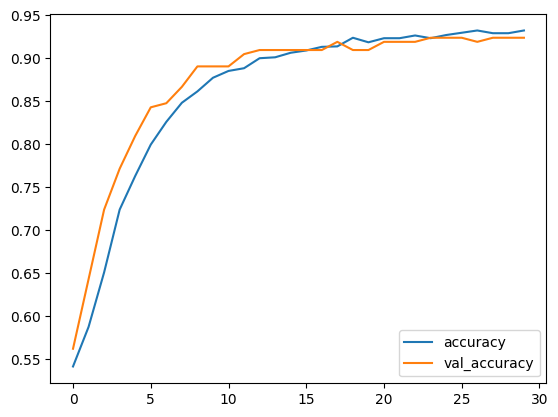

In [70]:
h_df.loc[:, ['accuracy', 'val_accuracy']].plot();

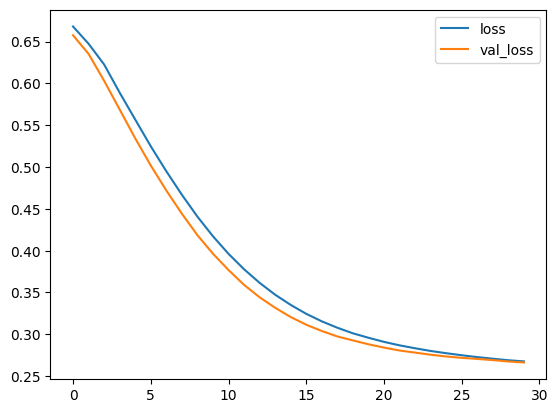

In [71]:
h_df.loc[:, ['loss', 'val_loss']].plot();